In [17]:
# import necessary libraries

# data manipulation libraries
import pandas as pd
import numpy as np 

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# stratified splitting libraries
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load data

from the UCI machine learning repository, the statlog (German Credit Data) exists without actual headers in the text file, but the data card is present to help fill out the columns names using pandas

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

In [15]:
df = pd.read_csv("statlog_german_credit_data/german.data", header=None, delim_whitespace=True)
headers = [
    "Status of existing checking account",
    "Duration in month",
    "Credit history",
    "Purpose",
    "Credit amount",
    "Savings account/bonds",
    "Present employment since",
    "Installment rate in percentage of disposable income",
    "Personal status and sex",
    "Other debtors / guarantors",
    "Present residence since",
    "Property",
    "Age in years",
    "Other installment plans",
    "Housing",
    "Number of existing credits at this bank",
    "Job",
    "Number of people being liable to provide maintenance for",
    "Telephone",
    "Foreign worker",
    "Risk"
]
df.columns = headers
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

from the `.info()` we get that:

* there are 1000 instances and 20 features
* the instances most of the features are of integer data type and the rest of object data type
* there are no non-null instances

## Understanding the numerical features

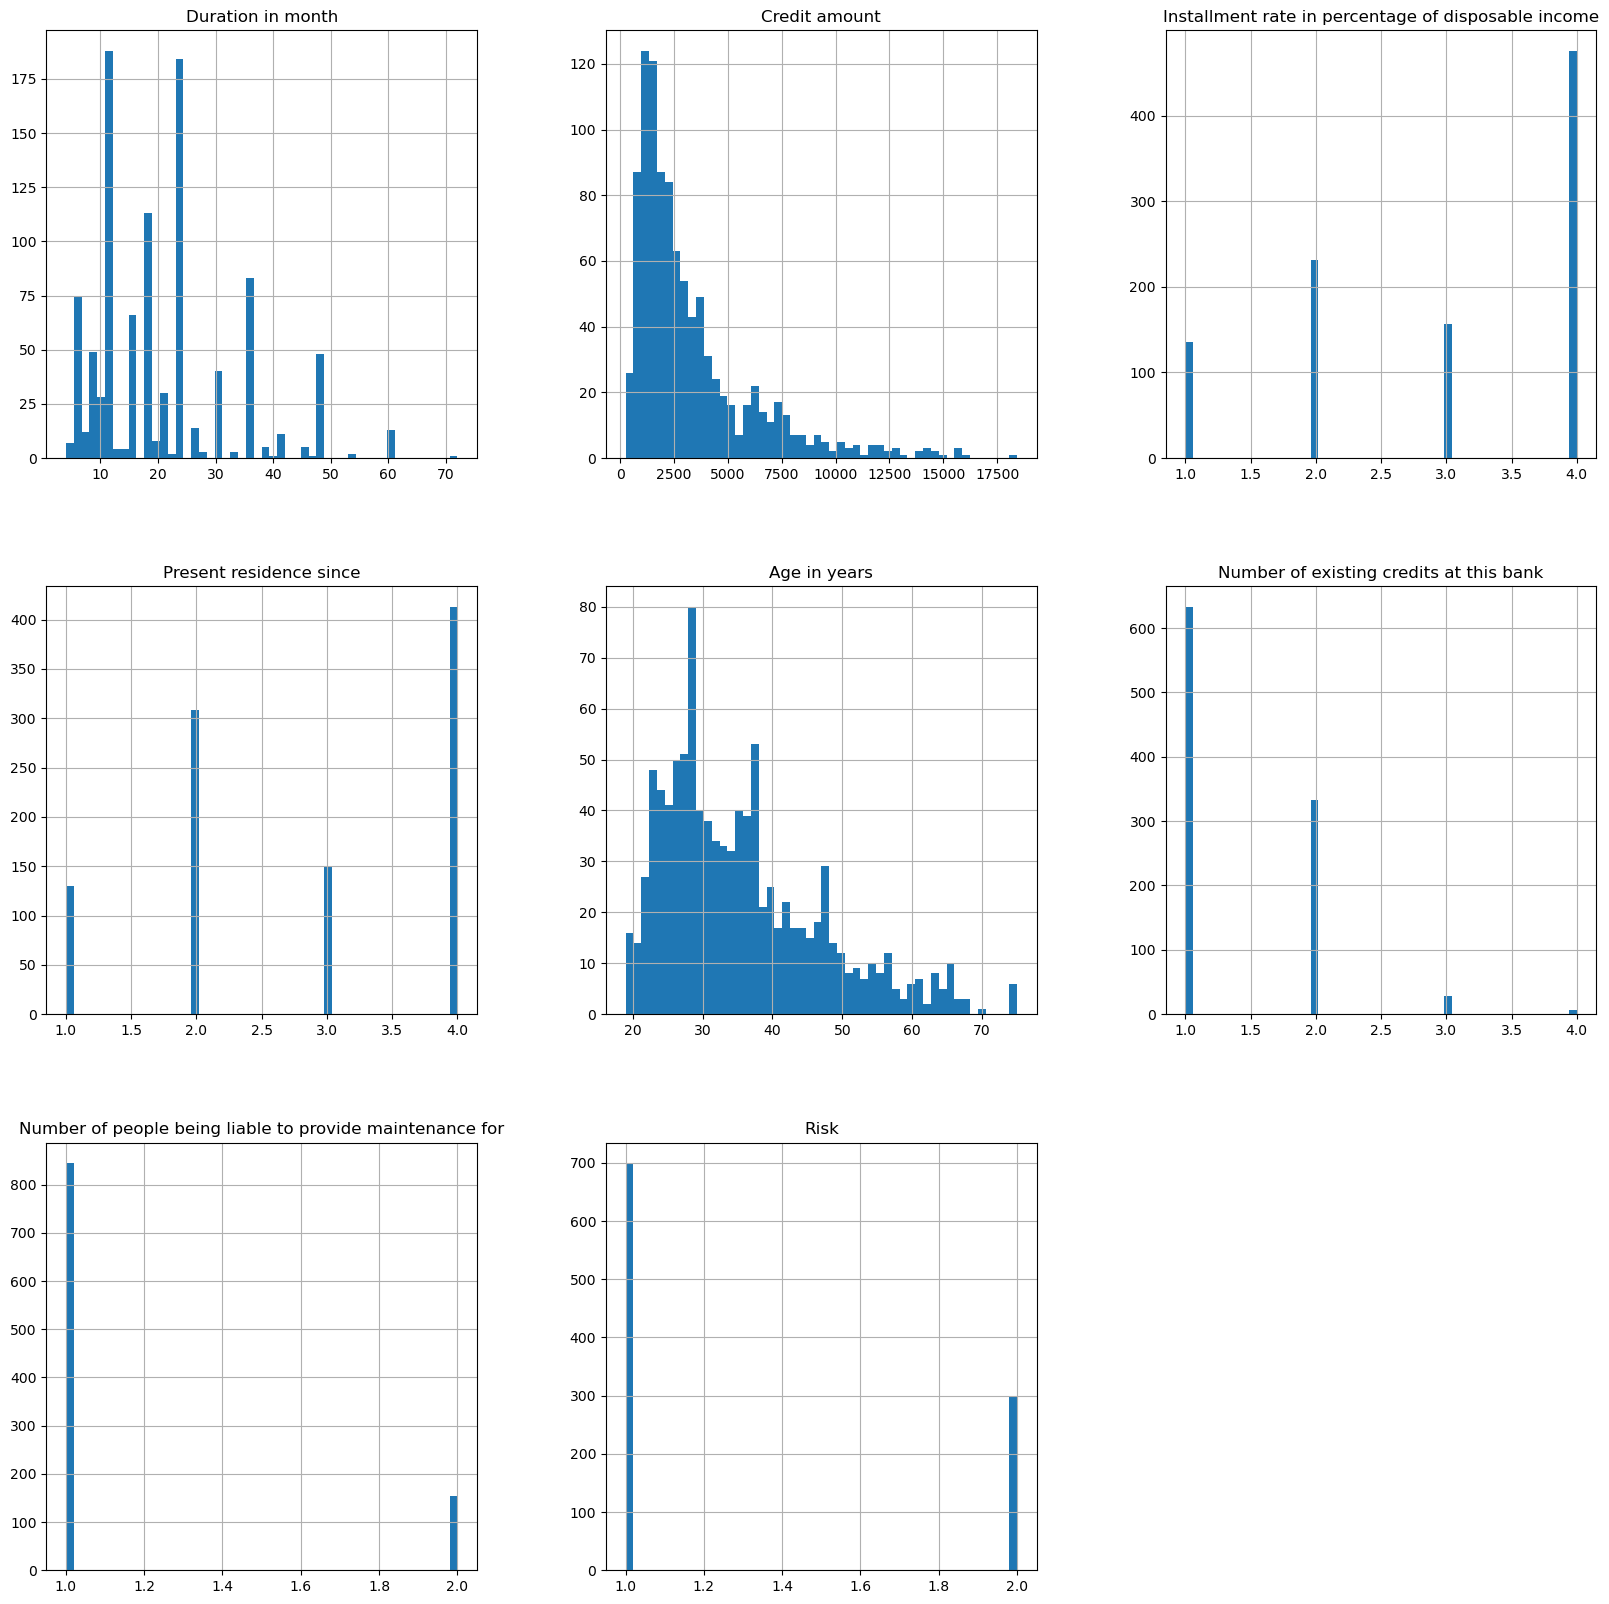

In [20]:
df.hist(figsize=(20, 20), bins=50)
plt.show()

From the histograms of the numerical features:
* `jobs`, `Number of existing credits at this bank`, `Number of people liable to provide maintenance for`, `present residence since`, `percentage of disposable income`, and `risk` are categorical features which will be converted to numerical before feeding it to the model
* The rest of the features are heavily skewed to the left

Before moving forward, the data should be split first

In [21]:
# stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Risk']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [23]:
strat_train_set.shape

(800, 21)

In [24]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 828 to 749
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       800 non-null    object
 1   Duration in month                                         800 non-null    int64 
 2   Credit history                                            800 non-null    object
 3   Purpose                                                   800 non-null    object
 4   Credit amount                                             800 non-null    int64 
 5   Savings account/bonds                                     800 non-null    object
 6   Present employment since                                  800 non-null    object
 7   Installment rate in percentage of disposable income       800 non-null    int64 
 8   Personal status and sex          

## Exploring the train set

In [25]:
credit_visualization = strat_train_set.copy()

In [30]:
credit_visualization["Risk"].value_counts()

Risk
1    560
2    240
Name: count, dtype: int64

In [32]:
percentage_distribution = credit_visualization["Risk"].value_counts()/len(credit_visualization)
percentage_distribution

Risk
1    0.7
2    0.3
Name: count, dtype: float64

The `RISK` feature is the target feature containing binary values:

- 1 = Good
- 2 = Bad

with no missing values

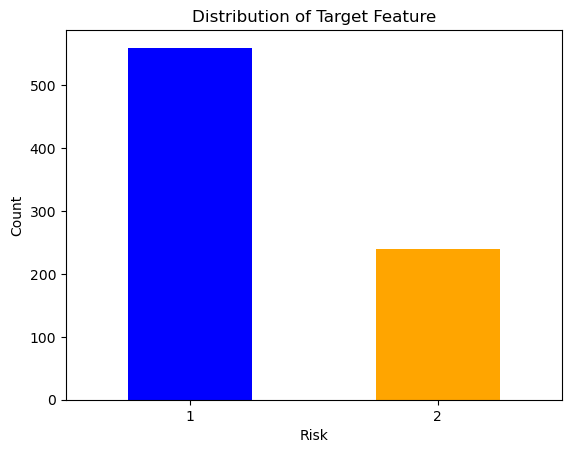

In [29]:
# target feature
credit_visualization["Risk"].value_counts().plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Target Feature")
plt.xlabel("Risk")
plt.ylabel("Count") 
plt.xticks(rotation=0)
plt.show()

In the training set, instances that fall in the `Good` class are more than the instances that fall in the `Bad` class, in a ratio 70:30. Our classes are imbalanced, meaning accuracy only won't be chosen to evaluate out risk model

In [33]:
# exploring the first feature
credit_visualization["Status of existing checking account"].value_counts()

Status of existing checking account
A14    316
A11    219
A12    214
A13     51
Name: count, dtype: int64

Because this is a german dataset, the currency will be converted to kenyan shillings. That is 1DM = ksh 0.27

- `A14` : No checking account
- `A11` : less the 0 shillings
- `A12` : less than 54 shillings
- `A13` : greater than 54 shillings

### Comparing status of existing checking account and the risk

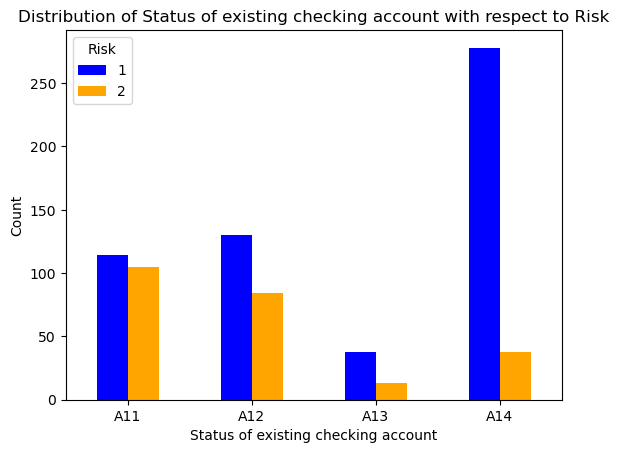

In [35]:
pd.crosstab(credit_visualization["Status of existing checking account"], credit_visualization["Risk"]).plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Status of existing checking account with respect to Risk")
plt.xlabel("Status of existing checking account")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Because of the varied distribution of the savings account classes the individuals with no checking account seem to have less risk compared to the rest of the classes & the individuals with more than 54 shillings are fewer but have less risks

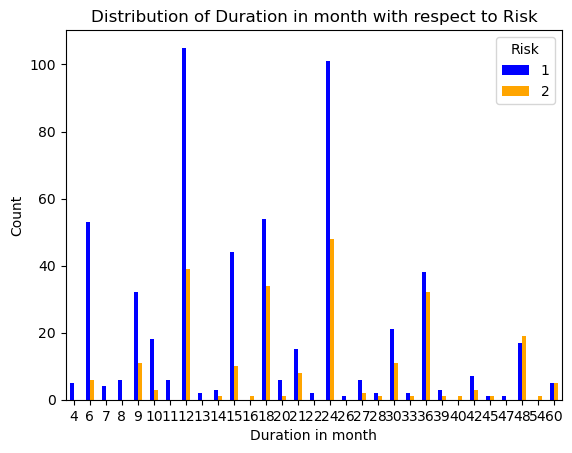

In [37]:
# explore the duration in month feature
credit_visualization["Duration in month"].value_counts()
pd.crosstab(credit_visualization["Duration in month"], credit_visualization["Risk"]).plot(kind="bar", color=["blue", "orange"])
plt.title("Distribution of Duration in month with respect to Risk") 
plt.xlabel("Duration in month")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()